<h2><b>Olist Database Analysis</b></h1>

Project ini melakukan fokus analisis pada produk dalam database olist.db yang merupakan data e-commerce di Brazil.

<h2><b>Objektif</b></h1>
<ul>
<li>Mengetahui 10 produk apa yang paling banyak dibeli.</li>
<li>Mengetahui 10 produk yang menghasilkan total sales paling tinggi.</li>
<li>Mengidentifikasi 10 Produk yang mendapat review paling baik dari pelanggan.</li>
<li>Mengetahui pertumbuhan pemesanan produk dari 5 produk yang paling tinggi.</li>

</ul>

<h2><b>Gambar Relasi Data di dalam Database olist.db</b></h1>

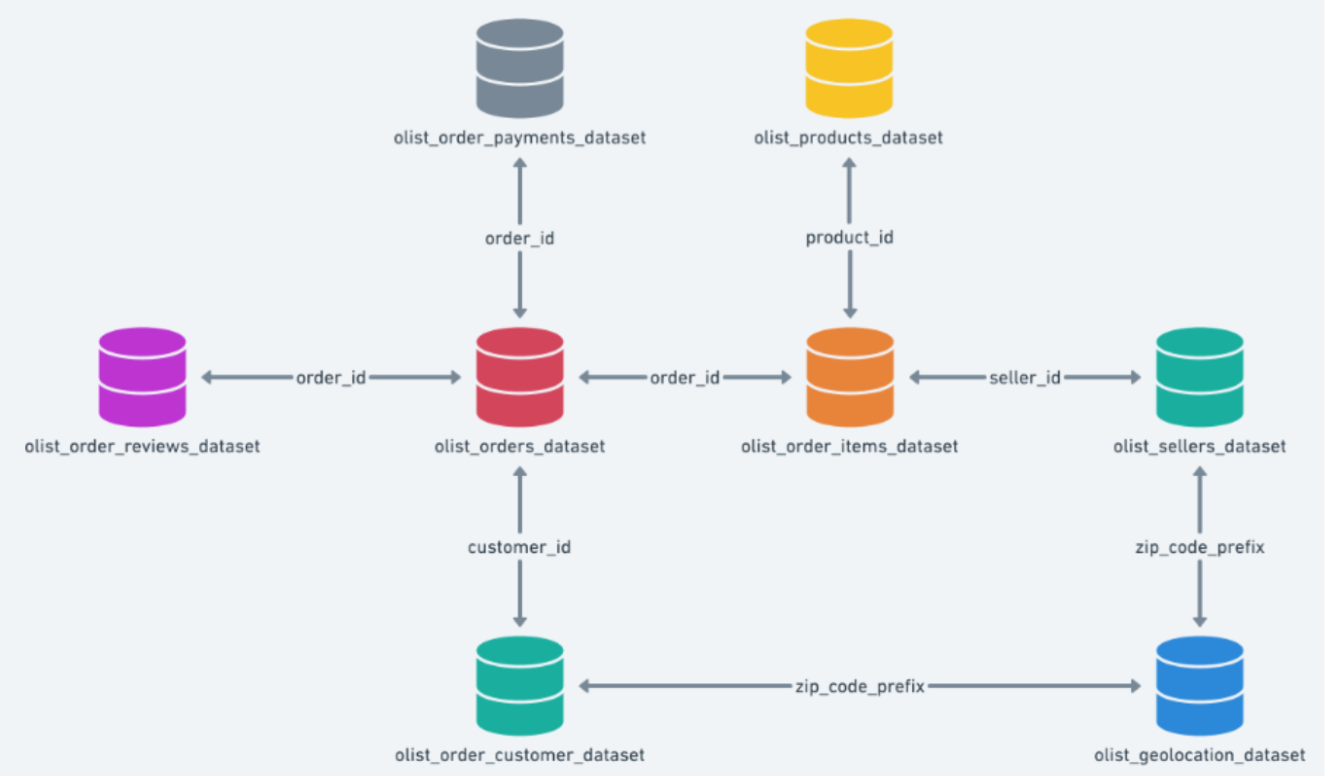

### Import Library

In [32]:
# Library pengolahan data
import pandas as pd
import numpy as np
import sqlite3
from datetime import date, timedelta

# Library visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Connect database

In [33]:
# connect database
con = sqlite3.connect("olist.db")
cur = con.cursor()

In [34]:
# Tabel dalam database
df = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", con)

In [35]:
# Convert table menjadi pandas dataframe
df_products = pd.read_sql("SELECT * FROM olist_products_dataset", con)
df_order_customer = pd.read_sql("SELECT * FROM olist_order_customer_dataset", con)
df_order = pd.read_sql("SELECT * FROM olist_order_dataset", con)
df_order_reviews = pd.read_sql("SELECT * FROM olist_order_reviews_dataset", con)
df_order_payments = pd.read_sql("SELECT * FROM olist_order_payments_dataset", con)
df_order_items = pd.read_sql("SELECT * FROM olist_order_items_dataset", con)
df_sellers = pd.read_sql("SELECT * FROM olist_sellers_dataset", con)
df_geolocation = pd.read_sql("SELECT * FROM olist_geolocation_dataset", con)
df_translations = pd.read_sql("SELECT * FROM product_category_name_translation", con)

In [36]:
# Melakukan join sesuai gambar relasi dengan dataframe yang diperlukan
join_df = df_products.merge(df_translations, on='product_category_name', how='inner') 
join_df = join_df.merge(df_order_items, on='product_id', how='outer')
join_df = join_df.merge(df_order, on='order_id', how='outer')
join_df = join_df.merge(df_order_reviews, on='order_id', how='outer')

In [37]:
join_df.head()

,index_x,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,...,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,index,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,0.0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,...,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09 00:00:00,25464.0,d71da8fd8c6e3adef26be965f065b8a1,5.0,Vale a pena,Super adooorei o delineador ele é bem preto e ...,2018-04-28 00:00:00,2018-05-04 00:55:02
1,16.0,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,...,2017-11-21 22:14:50,2017-11-23 15:39:38,2017-11-29 00:00:00,56174.0,0d953190c8ed55747f7b7ad3af2885e3,5.0,None,O produto que chegou é mais bonito do que eu e...,2017-11-24 00:00:00,2017-11-24 18:34:45
2,16.0,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,...,2017-12-09 00:53:08,2017-12-13 20:52:32,2017-12-18 00:00:00,45131.0,8e762254a11ad4292ec8fb6586c681cf,2.0,None,None,2017-12-14 00:00:00,2017-12-17 02:57:05
3,77.0,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,...,2017-07-28 21:42:11,2017-08-08 16:03:45,2017-08-21 00:00:00,83158.0,de311dfd0cf46c629921db407a7d87e9,5.0,None,ótimo produto e ótima loja para comprar pelo s...,2017-08-09 00:00:00,2017-08-09 19:30:09
4,77.0,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,...,2018-06-01 09:04:00,2018-06-07 19:12:50,2018-06-05 00:00:00,43043.0,097582b6b0630f5cb1a409c223c406dc,3.0,Não passou confiança,"O fornecedor e a nf é de São Paulo, o produto ...",2018-06-07 00:00:00,2018-06-12 13:44:18


### Data Cleaning

In [38]:
# mengambil kolom sesuai dengan hal yang ingin dianalisis

df_new = join_df[['product_id',
                  'order_id',
                  'order_purchase_timestamp',
                  'product_category_name_english',
                  'price',
                  'review_score']].copy()
df_new.head()

,product_id,order_id,order_purchase_timestamp,product_category_name_english,price,review_score
0,1e9e8ef04dbcff4541ed26657ea517e5,e17e4f88e31525f7deef66779844ddce,2018-04-24 16:16:53,perfumery,10.91,5.0
1,6a2fb4dd53d2cdb88e0432f1284a004c,048cc42e03ca8d43c729adf6962cb348,2017-11-16 21:28:00,perfumery,16.90,5.0
2,6a2fb4dd53d2cdb88e0432f1284a004c,5fa78e91b5cb84b6a8ccc42733f95742,2017-11-30 01:51:23,perfumery,16.90,2.0
3,0d009643171aee696f4733340bc2fdd0,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,2017-07-28 09:34:29,perfumery,339.00,5.0
4,0d009643171aee696f4733340bc2fdd0,7b13c77c64a9a956500cbf1a9a23798d,2018-05-17 09:24:18,perfumery,275.00,3.0


In [39]:
# Cek jumlah missing value
df_new.isna().sum()

product_id                        778
order_id                            0
order_purchase_timestamp            0
product_category_name_english    2414
price                             778
review_score                      961
dtype: int64

In [40]:
# Hapus missing value
data_clean = df_new.dropna()

# Cek kembali
check_na = data_clean.isna().sum()
check_na

product_id                       0
order_id                         0
order_purchase_timestamp         0
product_category_name_english    0
price                            0
review_score                     0
dtype: int64

In [41]:
# duplikat kolom order_id
dup_order_id = df_new.duplicated(subset=['order_id']).sum()
dup_order_id

14651

In [42]:
df_clean = df_new.drop_duplicates(subset=['order_id'])
dup_order_id = df_clean.duplicated(subset=['order_id']).sum()
dup_order_id

0

In [43]:
df_clean.shape

(99441, 6)

### Data Manipulasi

In [45]:
df_clean['order_purchase_timestamp'] = pd.to_datetime(df_clean['order_purchase_timestamp'])
df_clean['day'] = df_clean['order_purchase_timestamp'].dt.day
df_clean['month'] = df_clean['order_purchase_timestamp'].dt.month
df_clean['year'] = df_clean['order_purchase_timestamp'].dt.year

In [46]:
print(min(df_clean['order_purchase_timestamp']))
print(max(df_clean['order_purchase_timestamp']))
df_clean = df_clean.drop(columns = ['order_purchase_timestamp'])

2016-09-04 21:15:19
2018-10-17 17:30:18


In [59]:
df_clean.head()

,product_id,order_id,product_category_name_english,price,review_score,day,month,year
0,1e9e8ef04dbcff4541ed26657ea517e5,e17e4f88e31525f7deef66779844ddce,perfumery,10.91,5.0,24,4,2018
1,6a2fb4dd53d2cdb88e0432f1284a004c,048cc42e03ca8d43c729adf6962cb348,perfumery,16.90,5.0,16,11,2017
2,6a2fb4dd53d2cdb88e0432f1284a004c,5fa78e91b5cb84b6a8ccc42733f95742,perfumery,16.90,2.0,30,11,2017
3,0d009643171aee696f4733340bc2fdd0,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,perfumery,339.00,5.0,28,7,2017
4,0d009643171aee696f4733340bc2fdd0,7b13c77c64a9a956500cbf1a9a23798d,perfumery,275.00,3.0,17,5,2018


In [58]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 114091
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     98666 non-null  object 
 1   order_id                       99441 non-null  object 
 2   product_category_name_english  97256 non-null  object 
 3   price                          98666 non-null  float64
 4   review_score                   98673 non-null  float64
 5   day                            99441 non-null  int64  
 6   month                          99441 non-null  int64  
 7   year                           99441 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 6.8+ MB


### Analisis

#### Mengetahui 10 produk apa yang paling banyak dibeli.

In [48]:
top_10_order = df_clean.groupby(['product_category_name_english']).agg({'order_id':'count'}).sort_values(by='order_id', ascending=False).head(10)
top_10_order = top_10_order.reset_index()
top_10_order

,product_category_name_english,order_id
0,bed_bath_table,9298
1,health_beauty,8791
2,sports_leisure,7717
3,computers_accessories,6674
4,furniture_decor,6398
5,housewares,5867
6,watches_gifts,5592
7,telephony,4177
8,auto,3874
9,toys,3853


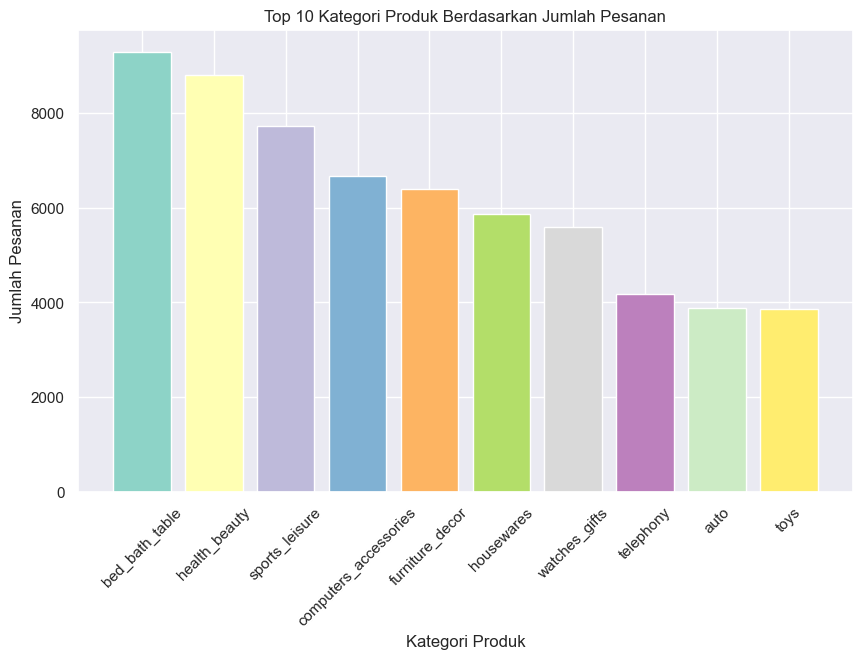

In [49]:
plt.figure(figsize=(10, 6))
colors = plt.cm.Set3(np.linspace(0, 1, len(top_10_order)))

plt.bar(top_10_order['product_category_name_english'], top_10_order['order_id'], color=colors)
plt.xlabel('Kategori Produk')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Pesanan')
plt.title('Top 10 Kategori Produk Berdasarkan Jumlah Pesanan')
plt.show()

#### Mengetahui 10 produk yang menghasilkan total sales paling tinggi.

In [50]:
total_sales = df_clean.groupby(['product_category_name_english']).agg({'price':'sum'}).sort_values(by='price', ascending=False).head(10)
total_sales = total_sales.reset_index()
total_sales

,product_category_name_english,price
0,health_beauty,1189984.42
1,watches_gifts,1166757.00
2,sports_leisure,916680.40
3,bed_bath_table,893464.15
4,computers_accessories,778504.83
5,cool_stuff,617234.76
6,furniture_decor,605783.34
7,housewares,563460.73
8,auto,549547.97
9,toys,465316.51


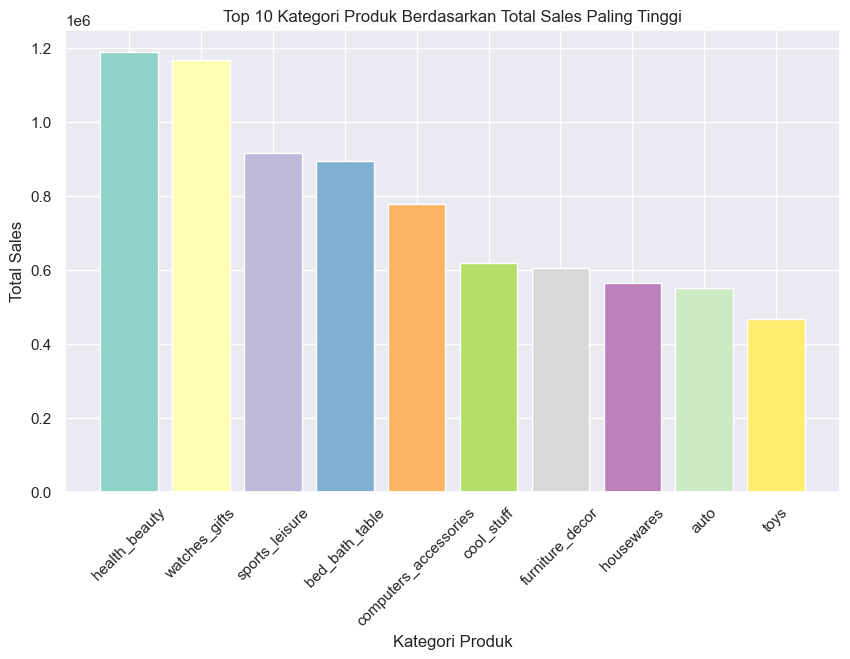

In [51]:
plt.figure(figsize=(10, 6))
colors = plt.cm.Set3(np.linspace(0, 1, len(total_sales)))

plt.bar(total_sales['product_category_name_english'], total_sales['price'], color=colors)
plt.xlabel('Kategori Produk')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.title('Top 10 Kategori Produk Berdasarkan Total Sales Paling Tinggi')
plt.show()

#### Mengidentifikasi 10 Produk yang mendapat review paling baik dari pelanggan.

In [52]:
rata_review = df_clean.groupby(['product_category_name_english']).agg({'review_score':'mean'}).sort_values(by='review_score', ascending=False).head(10)
rata_review = rata_review.reset_index()
rata_review

,product_category_name_english,review_score
0,cds_dvds_musicals,4.666667
1,la_cuisine,4.545455
2,flowers,4.538462
3,books_general_interest,4.467327
4,costruction_tools_tools,4.425532
5,books_technical,4.407843
6,fashion_sport,4.400000
7,music,4.388889
8,food_drink,4.382883
9,cine_photo,4.333333


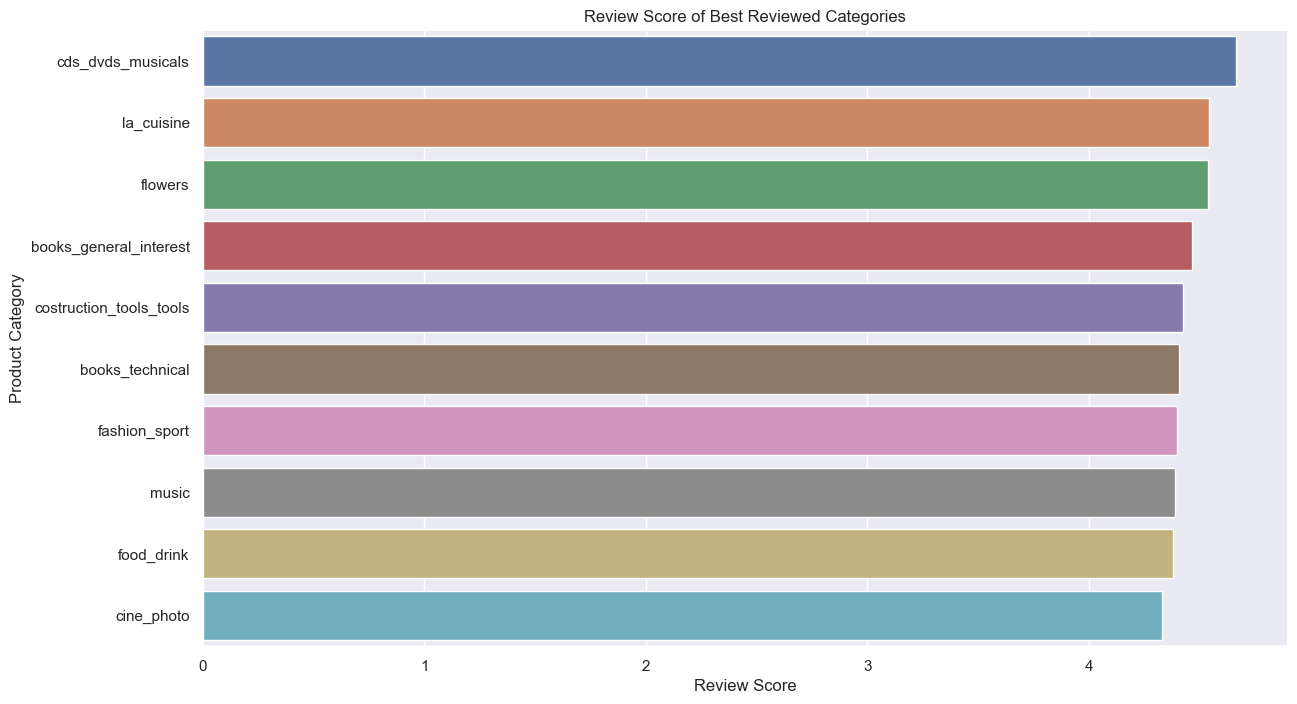

In [53]:
sns.barplot(
    x = 'review_score',
    y = 'product_category_name_english',
    data = rata_review
)
plt.xlabel('Review Score')
plt.ylabel('Product Category')
plt.title('Review Score of Best Reviewed Categories')
plt.show()

#### Mengetahui pertumbuhan pemesanan produk dari 5 produk yang paling tinggi.

In [54]:
top_5_order = df_clean[['product_category_name_english','order_id']].groupby(['product_category_name_english']).count().sort_values(by = ['order_id'], ascending = False).head(5)
top_5_order

,order_id
product_category_name_english,
bed_bath_table,9298
health_beauty,8791
sports_leisure,7717
computers_accessories,6674
furniture_decor,6398


In [55]:
# memilih 10 product yang paling laris
grow_products = df_clean.query('product_category_name_english in @top_5_order.index')
grow_products

,product_id,order_id,product_category_name_english,price,review_score,day,month,year
3683,96bd76ec8810374ed1b65e291975717f,01f66e58769f84129811d43eefd187fb,sports_leisure,79.8,5.0,9,7,2018
3684,3bb7f144022e6732727d8d838a7b13b3,7f6209da874fb56bf2fd26791d83bcb8,sports_leisure,26.7,5.0,4,6,2017
3685,051b9ff13dd55c0a6655a15ff296f80d,ad979a858d9d6a2b8bbec764d452d1a9,sports_leisure,285.0,5.0,2,8,2018
3686,ce5b91848b91118daffb3af53b747475,2bfb6645f99e561b82bbdd84c98da7e1,sports_leisure,19.9,5.0,11,5,2018
3687,5eaa343860dc445b3fd43d1b682809fd,77338308426749365f169773fa614a56,sports_leisure,1090.0,5.0,15,8,2018
...,...,...,...,...,...,...,...,...
69776,c1cf541d5b33a4b04ddc1c3be7aa1c86,b2947cf9a8d3084369dfcbe9663dd545,health_beauty,38.0,5.0,24,8,2018
69777,c1cf541d5b33a4b04ddc1c3be7aa1c86,b9ce9285aa642df4742b9839964076c6,health_beauty,38.0,5.0,23,7,2018
69778,c1cf541d5b33a4b04ddc1c3be7aa1c86,c9df12344ba358f97f2ee696709f2415,health_beauty,38.0,5.0,6,8,2018
69779,c1cf541d5b33a4b04ddc1c3be7aa1c86,e1dd3bcc1f22b4213a185eec19606daf,health_beauty,38.0,1.0,21,7,2018


In [56]:
grow_order = pd.DataFrame(data = grow_products.groupby(['month', 'product_category_name_english'])['order_id'].count()).sort_values(by = ['order_id'], ascending = False)
grow_order.head()

,,order_id
month,product_category_name_english,
8,health_beauty,1116
6,health_beauty,1030
7,bed_bath_table,1016
8,bed_bath_table,990
7,health_beauty,985


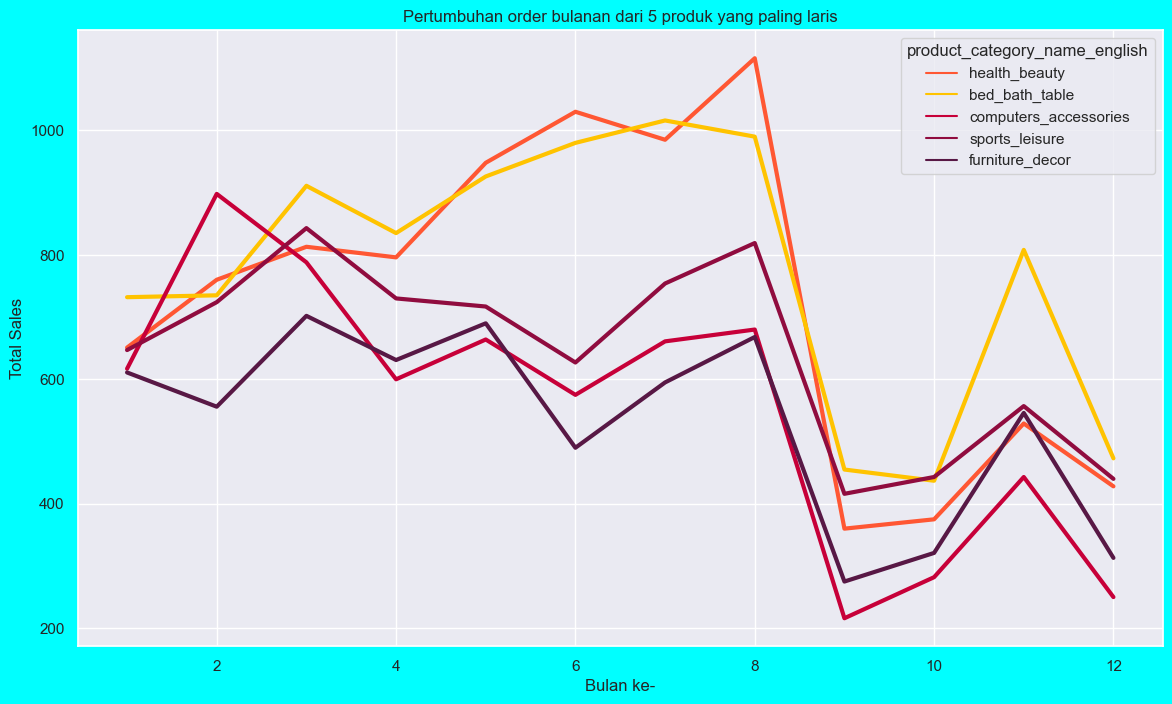

In [57]:
sns.set(rc={'figure.figsize':(14,8)})

# Mengubah latar belakang plot menjadi hitam
fig = plt.figure(facecolor='cyan')

custom_palette = ['#FF5733', '#FFC300', '#C70039', '#900C3F', '#581845'] 

ax = sns.lineplot(data=grow_order, x='month', y='order_id',
                  hue='product_category_name_english', palette=custom_palette,
                  legend='full', lw=3)

plt.title("Pertumbuhan order bulanan dari 5 produk yang paling laris")
plt.ylabel('Total Sales')
plt.xlabel('Bulan ke-')
plt.show()
